In [533]:
data = pd.read_csv("311_311.csv")

# Feature Selection

In [358]:
data.columns

Index(['address_type', 'agency', 'agency_name', 'bbl', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'park_borough', 'park_facility_name',
       'resolution_action_updated_date', 'resolution_description', 'road_ramp',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'resolution_outcome'],
      dtype='object')

In [395]:
ndata = data.drop(['address_type', 'bbl', 'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'community_board',
       'cross_street_1', 'cross_street_2',
       'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'park_borough', 'park_facility_name',
       'road_ramp',
       'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'], axis=1)

In [544]:
#turn a categorical column into multiple dummy columns
prov_dummy = pd.get_dummies(ndata['borough'],prefix = 'b')
prov_dummy.head()

#dropping ed_5 and ed_6 as they are not specified in attribute information. Ed_6 only contained 51
# prov_dummy = prov_dummy.drop(columns=['Ed_5', 'Ed_6'])

#concating dummy variable dataframe w/ main dataframe
df = pd.concat([ndata, prov_dummy], axis = 1)
df.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name', 'resolution_outcome',
       'b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'b_QUEENS', 'b_STATEN ISLAND',
       'b_Unspecified'],
      dtype='object')

In [545]:
#turn a categorical column into multiple dummy columns
prov_dummy = pd.get_dummies(ndata['agency'],prefix = 'a')
prov_dummy.head()

#dropping ed_5 and ed_6 as they are not specified in attribute information. Ed_6 only contained 51
# prov_dummy = prov_dummy.drop(columns=['Ed_5', 'Ed_6'])

#concating dummy variable dataframe w/ main dataframe
df = pd.concat([df, prov_dummy], axis = 1)
df.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name', 'resolution_outcome',
       'b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'b_QUEENS', 'b_STATEN ISLAND',
       'b_Unspecified', 'a_DCA', 'a_DEP', 'a_DFTA', 'a_DHS', 'a_DOB',
       'a_DOHMH', 'a_DOITT', 'a_DOT', 'a_DPR', 'a_DSNY', 'a_HPD', 'a_NYPD',
       'a_TLC'],
      dtype='object')

In [550]:
#turn a categorical column into multiple dummy columns
prov_dummy = pd.get_dummies(ndata['complaint_type'],prefix = 'complaint')
prov_dummy.head()

#dropping ed_5 and ed_6 as they are not specified in attribute information. Ed_6 only contained 51
# prov_dummy = prov_dummy.drop(columns=['Ed_5', 'Ed_6'])

#concating dummy variable dataframe w/ main dataframe
df = pd.concat([df, prov_dummy], axis = 1)
df.columns

Index(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type',
       ...
       'complaint_Street Light Condition', 'complaint_Street Sign - Damaged',
       'complaint_Taxi Complaint', 'complaint_Traffic',
       'complaint_Traffic Signal Condition', 'complaint_UNSANITARY CONDITION',
       'complaint_Unsanitary Animal Pvt Property', 'complaint_WATER LEAK',
       'complaint_Water Quality', 'complaint_Water System'],
      dtype='object', length=115)

In [552]:
df.shape

(1000, 115)

In [559]:
odata = df.drop(['agency', 'agency_name', 'borough', 'city', 'closed_date',
       'complaint_type', 'created_date', 'descriptor', 'due_date',
       'facility_type', 'latitude', 'location', 'location_type', 'longitude',
       'open_data_channel_type', 'resolution_action_updated_date',
       'resolution_description', 'status', 'street_name'], axis=1)

In [560]:
odata.head()

,resolution_outcome,b_BRONX,b_BROOKLYN,b_MANHATTAN,b_QUEENS,b_STATEN ISLAND,b_Unspecified,a_DCA,a_DEP,a_DFTA,...,complaint_Street Light Condition,complaint_Street Sign - Damaged,complaint_Taxi Complaint,complaint_Traffic,complaint_Traffic Signal Condition,complaint_UNSANITARY CONDITION,complaint_Unsanitary Animal Pvt Property,complaint_WATER LEAK,complaint_Water Quality,complaint_Water System
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [643]:
odata.columns

Index(['resolution_outcome', 'b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN',
       'b_QUEENS', 'b_STATEN ISLAND', 'b_Unspecified', 'a_DCA', 'a_DEP',
       'a_DFTA', 'a_DHS', 'a_DOB', 'a_DOHMH', 'a_DOITT', 'a_DOT', 'a_DPR',
       'a_DSNY', 'a_HPD', 'a_NYPD', 'a_TLC', 'complaint_APPLIANCE',
       'complaint_Air Quality', 'complaint_Animal Abuse',
       'complaint_Animal in a Park', 'complaint_Asbestos',
       'complaint_Blocked Driveway', 'complaint_Boilers',
       'complaint_Borough Office', 'complaint_Building/Use',
       'complaint_Bus Stop Shelter Complaint',
       'complaint_Collection Truck Noise', 'complaint_Consumer Complaint',
       'complaint_Curb Condition', 'complaint_DOOR/WINDOW',
       'complaint_Damaged Tree', 'complaint_Day Care',
       'complaint_Derelict Vehicle', 'complaint_Derelict Vehicles',
       'complaint_Dirty Conditions', 'complaint_Drinking',
       'complaint_ELECTRIC', 'complaint_ELEVATOR', 'complaint_Electrical',
       'complaint_Electronics Waste', 'c

# Logistic Regression

In [959]:
X = odata.drop('resolution_outcome', axis=1)
y = odata['resolution_outcome']
feature_cols = X.columns

In [960]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [961]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [962]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
# the model perfectly predicts
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    585
1    165
Name: resolution_outcome, dtype: int64
0    0.78
1    0.22
Name: resolution_outcome, dtype: float64


In [963]:
#we subtract the y_test with the y_predition
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    182
1     68
Name: resolution_outcome, dtype: int64
0    0.728
1    0.272
Name: resolution_outcome, dtype: float64


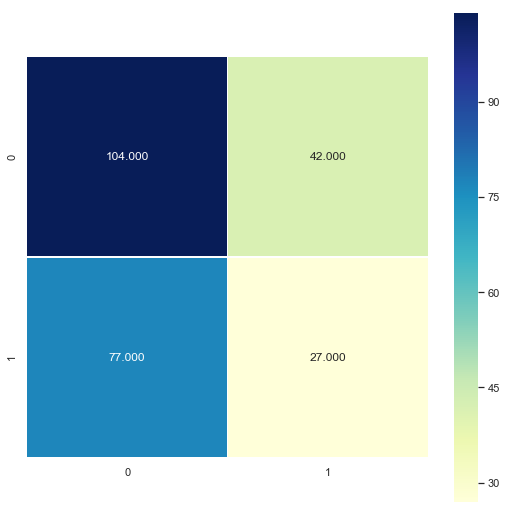

In [964]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

# Feature Engineering for Logistic Regression

In [575]:
print(X.columns)
print(logreg.coef_)

Index(['b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'b_QUEENS', 'b_STATEN ISLAND',
       'b_Unspecified', 'a_DCA', 'a_DEP', 'a_DFTA', 'a_DHS', 'a_DOB',
       'a_DOHMH', 'a_DOITT', 'a_DOT', 'a_DPR', 'a_DSNY', 'a_HPD', 'a_NYPD',
       'a_TLC', 'complaint_APPLIANCE', 'complaint_Air Quality',
       'complaint_Animal Abuse', 'complaint_Animal in a Park',
       'complaint_Asbestos', 'complaint_Blocked Driveway', 'complaint_Boilers',
       'complaint_Borough Office', 'complaint_Building/Use',
       'complaint_Bus Stop Shelter Complaint',
       'complaint_Collection Truck Noise', 'complaint_Consumer Complaint',
       'complaint_Curb Condition', 'complaint_DOOR/WINDOW',
       'complaint_Damaged Tree', 'complaint_Day Care',
       'complaint_Derelict Vehicle', 'complaint_Derelict Vehicles',
       'complaint_Dirty Conditions', 'complaint_Drinking',
       'complaint_ELECTRIC', 'complaint_ELEVATOR', 'complaint_Electrical',
       'complaint_Electronics Waste', 'complaint_Elevator',
       'c

In [965]:
X.drop(columns=['b_BRONX', 'b_BROOKLYN', 'b_MANHATTAN', 'a_DSNY', 'complaint_Boilers', 'complaint_Curb Condition', 'complaint_Drinking'], inplace=True)


In [966]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

logreg = LogisticRegression(penalty='l2', fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [967]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    570
1    180
Name: resolution_outcome, dtype: int64
0    0.76
1    0.24
Name: resolution_outcome, dtype: float64


In [968]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    191
1     59
Name: resolution_outcome, dtype: int64
0    0.764
1    0.236
Name: resolution_outcome, dtype: float64


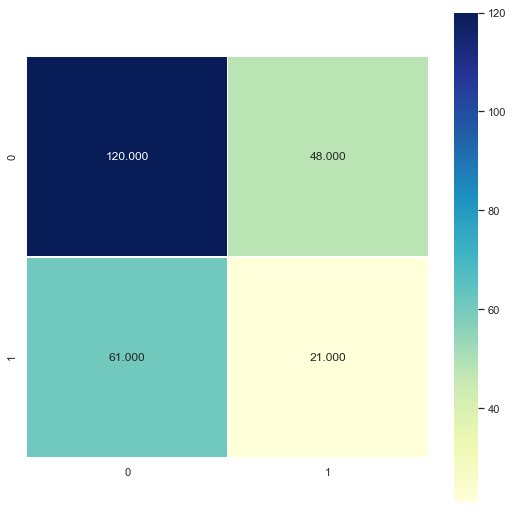

In [969]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

# UPSAMPLE

In [970]:
df.groupby(['resolution_outcome']).borough.count()

resolution_outcome
0    614
1    386
Name: borough, dtype: int64

In [971]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [953]:
training.head()

,b_QUEENS,b_STATEN ISLAND,b_Unspecified,a_DCA,a_DEP,a_DFTA,a_DHS,a_DOB,a_DOHMH,a_DOITT,...,complaint_Street Sign - Damaged,complaint_Taxi Complaint,complaint_Traffic,complaint_Traffic Signal Condition,complaint_UNSANITARY CONDITION,complaint_Unsanitary Animal Pvt Property,complaint_WATER LEAK,complaint_Water Quality,complaint_Water System,resolution_outcome
936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
109,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [972]:
# separate minority and majority classes
negative = training[training.resolution_outcome==0]
positive = training[training.resolution_outcome==1]

In [973]:
print('negative outcomes count: '+ str(len(negative)))
print('positive outcomes count: '+ str(len(positive)))

negative outcomes count: 446
positive outcomes count: 304


In [974]:
# upsample minority
positive_upsampled = resample(positive,
                          replace=True, # sample with replacement
                          n_samples=len(negative), # match number in majority class
                          random_state=23) # reproducible results


In [975]:
# combine majority and upsampled minority
upsampled = pd.concat([negative, positive_upsampled])

# check new class counts
upsampled.resolution_outcome.value_counts()

1    446
0    446
Name: resolution_outcome, dtype: int64

In [976]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.resolution_outcome
X_train = upsampled.drop('resolution_outcome', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))



Test Accuracy score:  0.768
Test F1 score:  0.6588235294117647


# SMOTE Upsample

In [978]:

# setting up testing and training sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [979]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.768
Test F1 score:  0.6588235294117647


# Downsample

In [980]:
print('negative outcomes count: '+ str(len(negative)))
print('positive outcomes count: '+ str(len(positive)))

negative outcomes count: 446
positive outcomes count: 304


In [981]:
# downsample majority
negative_downsampled = resample(negative,
                                replace = False, # sample without replacement
                                n_samples = len(positive), # match minority n
                                random_state = 23) # reproducible results




In [982]:
# combine minority and downsampled majority
downsampled = pd.concat([negative_downsampled, positive])

# checking counts
downsampled.resolution_outcome.value_counts()

1    304
0    304
Name: resolution_outcome, dtype: int64

In [983]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.resolution_outcome
X_train = downsampled.drop('resolution_outcome', axis=1)


# downsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# downsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# downsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred))

Test Accuracy score:  0.74
Test F1 score:  0.632768361581921


# SMOTE Downsample

In [984]:

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [985]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.724
Test F1 score:  0.6634146341463415


# Random Forests

In [986]:
rfc = RandomForestClassifier(random_state = 23, n_estimators=100, max_depth=8)

In [648]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [987]:
X = odata.drop('resolution_outcome', axis=1)
y = odata['resolution_outcome']
feature_cols = X.columns

In [988]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [989]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [990]:
rfc_pred = rfc.predict(X_test)

# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))

# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.72
Test F1 score:  0.5205479452054794


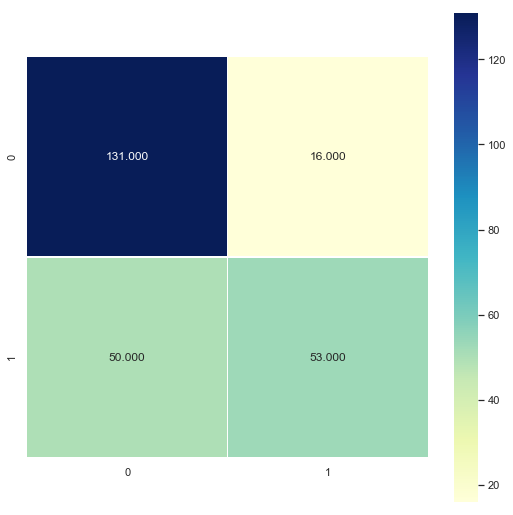

In [991]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

In [992]:
param_grid = { 
    'n_estimators': [200,300], #tree
    'max_features': [0.25, 0.33, 0.5 ], #every single node, trying to decide which feature to split on
    'max_depth' : [5,6,7,8,9],
    'min_samples_leaf': [0.03,0.04,0.05,0.06]
}

In [993]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=5, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=23, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 300], 'max_features': [0.25, 0.33, 0.5], 'max_depth': [5, 6, 7, 8, 9], 'min_samples_leaf': [0.03, 0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [994]:
CV_rfc.best_params_

{'max_depth': 5,
 'max_features': 0.25,
 'min_samples_leaf': 0.03,
 'n_estimators': 200}

In [996]:
rfc_pred = CV_rfc.best_estimator_.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.692
Test F1 score:  0.4460431654676259


### errors/concerns

# KNN

In [998]:
X = odata.drop('resolution_outcome', axis=1)
y = odata.resolution_outcome

In [999]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

 


In [1000]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/Users/fhel/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  
/Users/fhel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  import sys


In [1001]:
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
test_preds = clf1.predict(X_test)

In [1002]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7638888888888888
Recall Score: 0.5339805825242718
Accuracy Score: 0.74
F1 Score: 0.6285714285714286


In [1003]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [1004]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 3
F1-Score: 0.6597938144329898


# Decision Tree

In [724]:
X = odata.drop('resolution_outcome', axis=1)
y = odata.resolution_outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

In [725]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.6578366445916114
Testing F1 Score: 0.6162790697674418


In [728]:
parameters={'max_depth': range(2,20,1),
            'max_features': range(1,96,5) }

In [ ]:
grid_tree=GridSearchCV(clf,parameters, verbose=5, cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

#GridSearchCV(cv=5, error_score='raise-deprecating',
#        estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#             max_features=None, max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#             splitter='best'),
#        fit_params=None, iid='warn', n_jobs=None,
#        param_grid={'max_depth': range(2, 20), 'max_features': range(1, 96, 5)},
#        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#        scoring='f1', verbose=5)

In [736]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.5310212018175113
{'max_depth': 12, 'max_features': 41}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=41, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


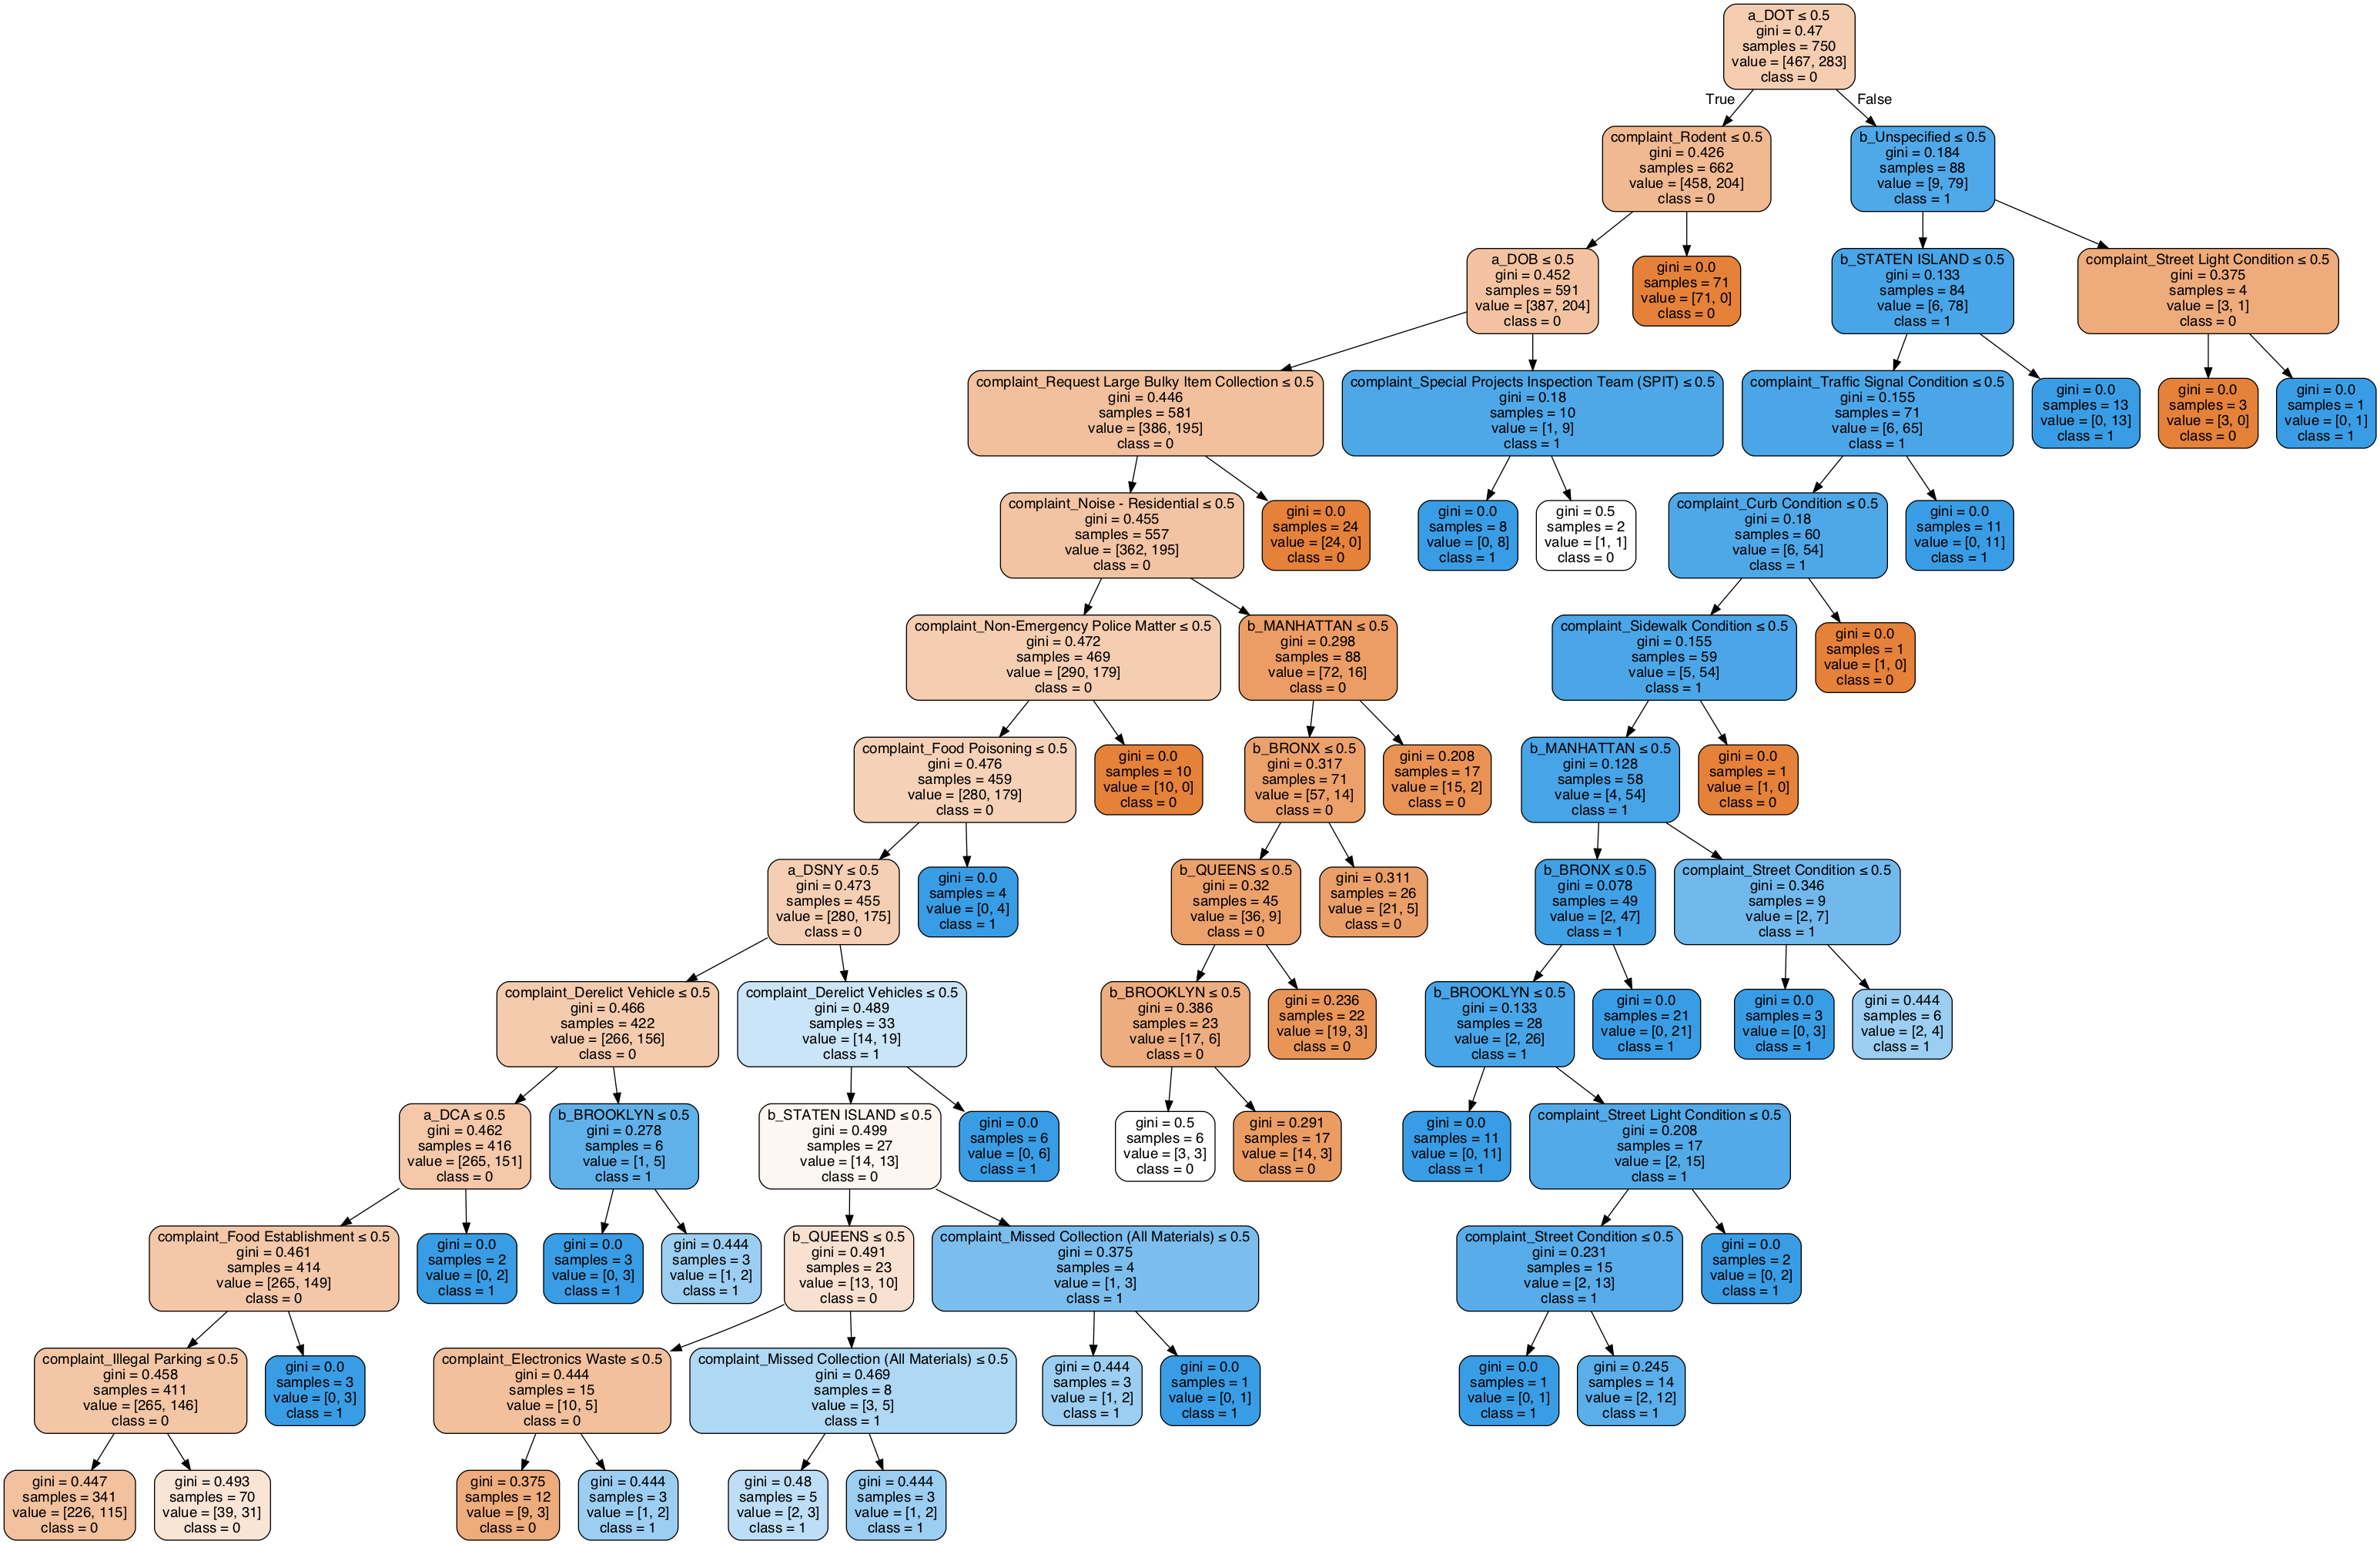

In [737]:
dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('resolution_outcomes.png')
Image(graph.create_png())

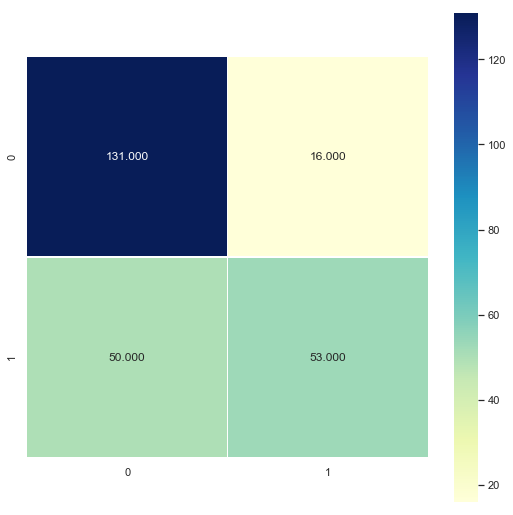

In [738]:
cm_lr = metrics.confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "YlGnBu")

# XGBoost

In [742]:
import xgboost as xgb
# import xgboost as XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [747]:
X = odata.drop('resolution_outcome', axis=1)
y = odata.resolution_outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 23)

In [748]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [749]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [750]:
xg_clf.fit(X_train,y_train)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [751]:
preds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.724000
F1: 0.536913


kfold cross validation using XGBoost

In [753]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
#create dmatrix from our data.  unique to xgboost

In [754]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 2, 'alpha': 10}
#boosted rounds is how many trees i'm going to make
#early stopping, 5 consecutive models where the model is not getting better, it will stop
#metric logloss b/c binary classification
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=500,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.677270,0.001786,0.677752,0.002990
1,0.668168,0.003849,0.668638,0.005917
2,0.661208,0.004683,0.662656,0.006362
3,0.655417,0.004724,0.656934,0.010637
4,0.647058,0.004745,0.648179,0.014530
5,0.640895,0.005617,0.643343,0.014122
6,0.635522,0.005609,0.638578,0.014993
7,0.629975,0.006759,0.633178,0.017363
8,0.627083,0.006296,0.630933,0.017724
9,0.623372,0.006435,0.627384,0.018334


In [756]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [757]:
%matplotlib inline

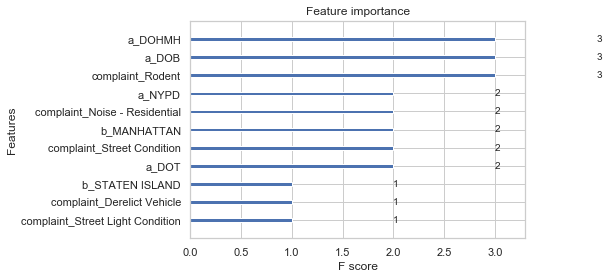

In [758]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [762]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg
#     feat_imp = pd.Series(alg.get_booster().get_fscore())
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [763]:
train  = pd.concat([X_train, y_train], axis=1)
target = 'resolution_outcome'
# IDcol = 'PassengerId'

In [764]:
train.head()

,b_BRONX,b_BROOKLYN,b_MANHATTAN,b_QUEENS,b_STATEN ISLAND,b_Unspecified,a_DCA,a_DEP,a_DFTA,a_DHS,...,complaint_Street Sign - Damaged,complaint_Taxi Complaint,complaint_Traffic,complaint_Traffic Signal Condition,complaint_UNSANITARY CONDITION,complaint_Unsanitary Animal Pvt Property,complaint_WATER LEAK,complaint_Water Quality,complaint_Water System,resolution_outcome
271,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
461,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [765]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [766]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=3,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)


Model Report
Accuracy : 0.7347
AUC Score (Train): 0.803902


In [767]:
alg.feature_importances_

array([0.0007047 , 0.00606494, 0.00766601, 0.00291301, 0.01911581,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03574308, 0.04028026, 0.        , 0.16048484, 0.        ,
       0.04010618, 0.03895788, 0.03128926, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03349279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03988911, 0.03337783, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02535365, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03196615,
       0.        , 0.        , 0.        , 0.00805275, 0.        ,
       0.        , 0.        , 0.03393457, 0.        , 0.02528559,
       0.02634043, 0.        , 0.        , 0.        , 0.     

In [768]:
alg.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=20,
       n_jobs=1, nthread=3, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)>

In [769]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1,verbose=5, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8, verbose=5),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [770]:
gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [771]:
gsearch1.best_score_

0.7639346736780179

In [772]:
preds = gsearch1.best_estimator_.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.732000
F1: 0.573248


In [773]:
from xgboost import plot_importance

NameError: name 'pyplot' is not defined

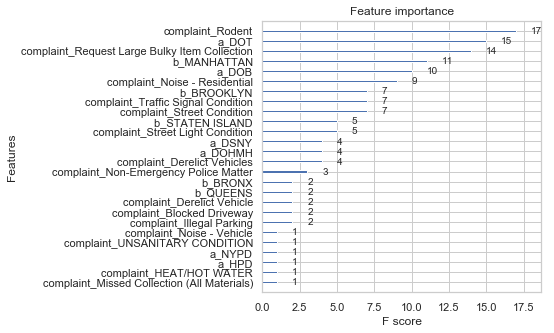

In [774]:
# plot feature importance
plot_importance(alg)
pyplot.show()

In [775]:
alg.get_booster().get_fscore()

{'complaint_Street Condition': 7,
 'complaint_Traffic Signal Condition': 7,
 'complaint_Street Light Condition': 5,
 'complaint_Derelict Vehicles': 4,
 'complaint_Illegal Parking': 2,
 'b_MANHATTAN': 11,
 'a_DOT': 15,
 'complaint_Rodent': 17,
 'a_DOB': 10,
 'complaint_Noise - Residential': 9,
 'complaint_Request Large Bulky Item Collection': 14,
 'a_DOHMH': 4,
 'a_DSNY': 4,
 'complaint_Blocked Driveway': 2,
 'complaint_Missed Collection (All Materials)': 1,
 'complaint_Derelict Vehicle': 2,
 'complaint_HEAT/HOT WATER': 1,
 'b_BROOKLYN': 7,
 'b_STATEN ISLAND': 5,
 'b_QUEENS': 2,
 'b_BRONX': 2,
 'complaint_Non-Emergency Police Matter': 3,
 'a_HPD': 1,
 'a_NYPD': 1,
 'complaint_UNSANITARY CONDITION': 1,
 'complaint_Noise - Vehicle': 1}